In [1]:
%load_ext autoreload
%autoreload 2

from ff_energy.cli import *

atom_key_pairs [('CG331', 'CG331'), ('CG331', 'HGA3'), ('CG331', 'HGP1'), ('CG331', 'HT'), ('CG331', 'OG311'), ('CG331', 'OT'), ('HGA3', 'HGA3'), ('HGA3', 'HGP1'), ('HGA3', 'HT'), ('HGA3', 'OG311'), ('HGA3', 'OT'), ('HGP1', 'HGP1'), ('HGP1', 'HT'), ('HGP1', 'OG311'), ('HGP1', 'OT'), ('HT', 'HT'), ('HT', 'OG311'), ('HT', 'OT'), ('OG311', 'OG311'), ('OG311', 'OT'), ('OT', 'OT')]


In [2]:
CMS = load_all_theory_and_elec()

In [251]:
for i, cms in enumerate(CMS):
    print(i, cms)

0 hfdz-water_cluster-pc
1 hfdz-water_cluster-mdcm
2 hftz-water_cluster-pc
3 hftz-water_cluster-mdcm
4 pbe0dz-water_cluster-pc
5 pbe0dz-water_cluster-mdcm
6 pbe0tz-water_cluster-pc
7 pbe0tz-water_cluster-mdcm
8 pno-lccsd-pvtzdf-water_cluster-pc
9 pno-lccsd-pvtzdf-water_cluster-mdcm
10 hfdz-water_dimer-pc
11 hfdz-water_dimer-mdcm
12 hftz-water_dimer-pc
13 hftz-water_dimer-mdcm
14 pbe0dz-water_dimer-pc
15 pbe0dz-water_dimer-mdcm
16 pbe0tz-water_dimer-pc
17 pbe0tz-water_dimer-mdcm
18 pno-lccsd-pvtzdf-water_dimer-pc
19 pno-lccsd-pvtzdf-water_dimer-mdcm
20 hfdz-methanol_cluster-pc
21 hfdz-methanol_cluster-mdcm
22 hftz-methanol_cluster-pc
23 hftz-methanol_cluster-mdcm
24 pbe0dz-methanol_cluster-pc
25 pbe0dz-methanol_cluster-mdcm
26 pbe0tz-methanol_cluster-pc
27 pbe0tz-methanol_cluster-mdcm
28 pno-lccsd-pvtzdf-methanol_cluster-pc
29 pno-lccsd-pvtzdf-methanol_cluster-mdcm


In [254]:
jobs = charmm_jobs([CMS[14]])

pc
Strcuture,PDB already already exists, loading structure from pickle


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104/104 [00:00<00:00, 442.36it/s]


In [263]:
jobs[0].__dict__.keys()
# jobs[0].structures[0].__dict__

dict_keys(['pdbs', 'jobdir', 'structures', 'kwargs', 'molpro_jobs', 'charmm_jobs', 'coloumb_jobs', 'data'])

In [6]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [215]:
p = Path("/home/boittier/homepcb/water_dimer/pbe0dz_pc/")
keys = []
rmses = []
for x in list(p.glob("*/*/a*log")):
    with open(x) as f:
        lines = f.readlines()
        key = x.name[13:-4]
        res = float(lines[-5].split()[1])
        # print(key,res)
        keys.append(key)
        rmses.append(res)

pc_ = pd.DataFrame({"key": keys, "rmse": rmses})
pc_ = pc_.sort_values("key")

In [216]:
p = Path("/home/boittier/homepcb/water_dimer/pbe0dz_mdcm/")
keys = []
rmses = []
for x in list(p.glob("*/*/a*log")):
    with open(x) as f:
        lines = f.readlines()
        key = x.name[13:-4]
        res = float(lines[-5].split()[1])
        # print(key,res)
        keys.append(key)
        rmses.append(res)

mdcm_ = pd.DataFrame({"key": keys, "rmse": rmses})
mdcm_ = mdcm_.sort_values("key")

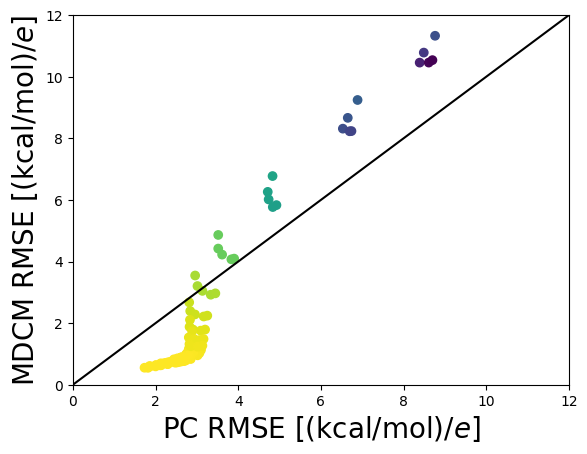

In [217]:
plt.scatter(pc_["rmse"], mdcm_["rmse"], c=col_pc["ECOL"])
plt.xlabel("PC RMSE [(kcal/mol)/$e$]", fontsize=20)
plt.ylabel("MDCM RMSE [(kcal/mol)/$e$]", fontsize=20)
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.plot([0, 12], [0, 12], c="k")

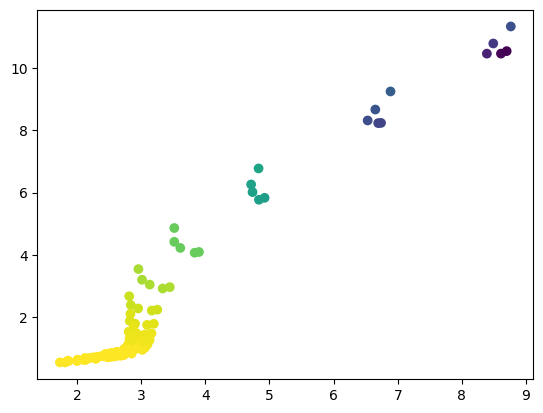

In [218]:
plt.scatter(pc_["rmse"], mdcm_["rmse"], c=col_pc["ECOL"])

In [219]:
col_pc

,ECOL,KEY,TOTAL,ELEC,VDW,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
1-1,-65.850961,1-1,56017.69650,-51.38855,11137.70216,-152.714178,-151.727265,619.290831,11086.31361,11086.31361
1-2,-73.125101,1-2,56844.90876,-50.97272,11435.44122,-152.714169,-151.711489,629.184601,11384.46850,11384.46850
1-3,-79.263613,1-3,56164.73741,-50.36029,11468.04558,-152.714157,-151.699480,636.712937,11417.68529,11417.68529
1-4,-86.461675,1-4,56595.09467,-49.72944,11811.81740,-152.714181,-151.678488,649.900408,11762.08796,11762.08796
1-5,-87.246371,1-5,57103.83326,-49.71131,11946.05148,-152.714180,-151.674625,652.323881,11896.34017,11896.34017
...,...,...,...,...,...,...,...,...,...,...
9-1,-2.417410,9-1,16.26814,-2.59167,-0.16976,-152.714178,-152.079676,398.151883,-2.76143,-2.76143
9-2,-2.253792,9-2,16.23316,-2.34228,-0.17406,-152.714157,-152.079309,398.369075,-2.51634,-2.51634
9-3,-2.123595,9-3,16.10003,-2.12721,-0.17710,-152.714183,-152.079059,398.542592,-2.30431,-2.30431
9-4,-1.953193,9-4,16.05853,-1.80819,-0.17993,-152.714170,-152.078731,398.739923,-1.98812,-1.98812


In [220]:
list(mdcm_.key)
mdcm_.head(10)

,key,rmse
95,1-1,11.329517
100,1-2,10.783577
84,1-3,10.458187
80,1-4,10.459180
70,1-5,10.538913
26,10-1,1.323517
87,10-2,1.164318
46,10-3,1.109413
71,10-4,1.096821
8,10-5,1.129212


In [221]:
pc_

,key,rmse
96,1-1,8.762237
101,1-2,8.488964
70,1-3,8.389661
61,1-4,8.608755
42,1-5,8.698054
...,...,...
63,9-1,2.928628
24,9-2,2.819367
2,9-3,2.849768
59,9-4,3.013106


In [222]:
from ff_energy.data import Data

pk = "pickles/water_dimer/pbe0_dz.pc"
data_ = Data(pk)
col_pc = data_.data.sort_values("KEY")
col_pc

,ECOL,KEY,TOTAL,ELEC,VDW,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
1-1,-65.850961,1-1,56017.69650,-51.38855,11137.70216,-152.714178,-152.386318,205.733240,11086.31361,11086.31361
1-2,-73.125101,1-2,56844.90876,-50.97272,11435.44122,-152.714169,-152.371993,214.716623,11384.46850,11384.46850
1-3,-79.263613,1-3,56164.73741,-50.36029,11468.04558,-152.714157,NaN,NaN,11417.68529,11417.68529
1-4,-86.461675,1-4,56595.09467,-49.72944,11811.81740,-152.714181,NaN,NaN,11762.08796,11762.08796
1-5,-87.246371,1-5,57103.83326,-49.71131,11946.05148,-152.714180,-152.337984,236.063723,11896.34017,11896.34017
...,...,...,...,...,...,...,...,...,...,...
9-1,-2.417410,9-1,16.26814,-2.59167,-0.16976,-152.714178,-152.718521,-2.725145,-2.76143,-2.76143
9-2,-2.253792,9-2,16.23316,-2.34228,-0.17406,-152.714157,-152.718201,-2.537622,-2.51634,-2.51634
9-3,-2.123595,9-3,16.10003,-2.12721,-0.17710,-152.714183,-152.718003,-2.397030,-2.30431,-2.30431
9-4,-1.953193,9-4,16.05853,-1.80819,-0.17993,-152.714170,-152.717737,-2.238090,-1.98812,-1.98812


In [223]:
from ff_energy.data import Data

pk = "pickles/water_dimer/pbe0_dz.mdcm"
data_ = Data(pk)
mdcm_pc = data_.data.sort_values("KEY")

In [224]:
mdcm_pc

,ECOL,KEY,TOTAL,ELEC,VDW,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
1-1,-65.850961,1-1,56032.57592,-39.21725,11137.70216,-152.714178,-152.386318,205.733240,11098.48491,11098.48491
1-2,-73.125101,1-2,56862.75752,-37.28936,11435.44122,-152.714169,-152.371993,214.716623,11398.15186,11398.15186
1-3,-79.263613,1-3,56182.45552,-37.51652,11468.04558,-152.714157,NaN,NaN,11430.52906,11430.52906
1-4,-86.461675,1-4,56612.18643,-39.90416,11811.81740,-152.714181,NaN,NaN,11771.91324,11771.91324
1-5,-87.246371,1-5,57121.11424,-40.37117,11946.05148,-152.714180,-152.337984,236.063723,11905.68031,11905.68031
...,...,...,...,...,...,...,...,...,...,...
9-1,-2.417410,9-1,16.05972,-1.92393,-0.16976,-152.714178,-152.718521,-2.725145,-2.09369,-2.09369
9-2,-2.253792,9-2,16.05170,-1.76409,-0.17406,-152.714157,-152.718201,-2.537622,-1.93815,-1.93815
9-3,-2.123595,9-3,15.94861,-1.65216,-0.17710,-152.714183,-152.718003,-2.397030,-1.82926,-1.82926
9-4,-1.953193,9-4,15.95753,-1.52587,-0.17993,-152.714170,-152.717737,-2.238090,-1.70580,-1.70580


In [225]:
col_pc

,ECOL,KEY,TOTAL,ELEC,VDW,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
1-1,-65.850961,1-1,56017.69650,-51.38855,11137.70216,-152.714178,-152.386318,205.733240,11086.31361,11086.31361
1-2,-73.125101,1-2,56844.90876,-50.97272,11435.44122,-152.714169,-152.371993,214.716623,11384.46850,11384.46850
1-3,-79.263613,1-3,56164.73741,-50.36029,11468.04558,-152.714157,NaN,NaN,11417.68529,11417.68529
1-4,-86.461675,1-4,56595.09467,-49.72944,11811.81740,-152.714181,NaN,NaN,11762.08796,11762.08796
1-5,-87.246371,1-5,57103.83326,-49.71131,11946.05148,-152.714180,-152.337984,236.063723,11896.34017,11896.34017
...,...,...,...,...,...,...,...,...,...,...
9-1,-2.417410,9-1,16.26814,-2.59167,-0.16976,-152.714178,-152.718521,-2.725145,-2.76143,-2.76143
9-2,-2.253792,9-2,16.23316,-2.34228,-0.17406,-152.714157,-152.718201,-2.537622,-2.51634,-2.51634
9-3,-2.123595,9-3,16.10003,-2.12721,-0.17710,-152.714183,-152.718003,-2.397030,-2.30431,-2.30431
9-4,-1.953193,9-4,16.05853,-1.80819,-0.17993,-152.714170,-152.717737,-2.238090,-1.98812,-1.98812


In [226]:
# _ = pd.read_csv("/home/boittier/Documents/phd/projectb/notebooks/sapt_dimer.csv")
# # _["KEY"] = _["key"].apply(lambda x: x.split(".")[0])
# _.sort_values("KEYS")

In [227]:
# _[_["RS"] != 0.00]

In [228]:
converters = {
    i: lambda x: float(x.strip().replace("D", "E")) * 627.503 * 10 ** (-3)
    for i in range(3, 10)
}
converters[0] = lambda x: x
converters[1] = lambda x: float(x.strip().replace("D", "E"))
converters[2] = lambda x: float(x.strip().replace("D", "E"))

#  read molpro csv
df = pd.read_csv("/home/boittier/pcbach/dimer3d/sapt.csv", converters=converters)
#  strip whitespace in column names
df = df.rename(columns=lambda x: x.strip())

In [229]:
df = df[df["RS"] != 0.00]

In [230]:
df["key"] = df["KEYS"].apply(lambda x: x.strip())
df.index = df["key"].apply(lambda x: x.strip())
df

,KEYS,RS,TS,ELST,EXCH,IND,EXIND,DISP,EXDISP,ETOT,key
key,,,,,,,,,,,
1-1,1-1,0.75,180.0,-62.373121,4.056921e+02,-318.197366,2.515914e+02,-35.614933,-4.037036e-01,240.694452,1-1
2-1,2-1,1.00,180.0,-61.080007,1.852532e+02,-111.370336,8.627128e+01,-20.122589,3.723402e+00,82.674903,2-1
3-1,3-1,1.25,180.0,-36.211838,7.964523e+01,-39.555195,2.925575e+01,-11.147753,2.685490e+00,24.671678,3-1
4-1,4-1,1.50,180.0,-20.247849,3.307793e+01,-14.405995,9.790059e+00,-6.174418,1.462394e+00,3.502116,4-1
5-1,5-1,1.75,180.0,-11.790530,1.349713e+01,-5.513265,3.288282e+00,-3.447615,7.158500e-01,-3.250147,5-1
...,...,...,...,...,...,...,...,...,...,...,...
12-5,12-5,3.50,90.0,-0.913704,2.024254e-02,-0.046512,2.525937e-03,-0.113131,2.312804e-03,-1.048266,12-5
13-5,13-5,4.25,90.0,-0.473149,1.119777e-03,-0.014520,1.380030e-04,-0.038197,1.642618e-04,-0.524445,13-5
14-5,14-5,5.00,90.0,-0.270115,5.359255e-05,-0.005766,9.085400e-06,-0.015719,1.147403e-05,-0.291525,14-5


In [231]:
df

,KEYS,RS,TS,ELST,EXCH,IND,EXIND,DISP,EXDISP,ETOT,key
key,,,,,,,,,,,
1-1,1-1,0.75,180.0,-62.373121,4.056921e+02,-318.197366,2.515914e+02,-35.614933,-4.037036e-01,240.694452,1-1
2-1,2-1,1.00,180.0,-61.080007,1.852532e+02,-111.370336,8.627128e+01,-20.122589,3.723402e+00,82.674903,2-1
3-1,3-1,1.25,180.0,-36.211838,7.964523e+01,-39.555195,2.925575e+01,-11.147753,2.685490e+00,24.671678,3-1
4-1,4-1,1.50,180.0,-20.247849,3.307793e+01,-14.405995,9.790059e+00,-6.174418,1.462394e+00,3.502116,4-1
5-1,5-1,1.75,180.0,-11.790530,1.349713e+01,-5.513265,3.288282e+00,-3.447615,7.158500e-01,-3.250147,5-1
...,...,...,...,...,...,...,...,...,...,...,...
12-5,12-5,3.50,90.0,-0.913704,2.024254e-02,-0.046512,2.525937e-03,-0.113131,2.312804e-03,-1.048266,12-5
13-5,13-5,4.25,90.0,-0.473149,1.119777e-03,-0.014520,1.380030e-04,-0.038197,1.642618e-04,-0.524445,13-5
14-5,14-5,5.00,90.0,-0.270115,5.359255e-05,-0.005766,9.085400e-06,-0.015719,1.147403e-05,-0.291525,14-5


In [232]:
pc_["RS"] = [
    list(df[df["key"] == k]["RS"])[0] if len(df[df["key"] == k]["RS"]) > 0 else None
    for k in pc_["key"]
]

mdcm_["RS"] = [
    list(df[df["key"] == k]["RS"])[0] if len(df[df["key"] == k]["RS"]) > 0 else None
    for k in mdcm_["key"]
]

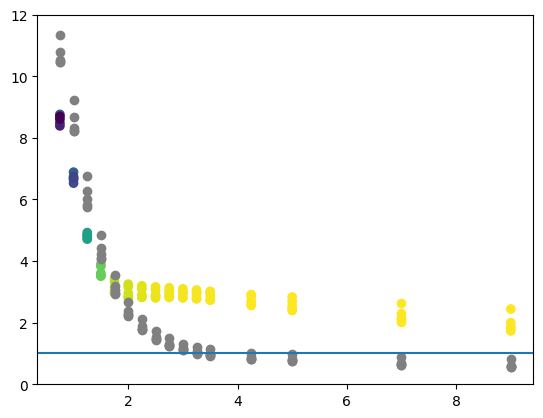

In [233]:
plt.scatter(pc_["RS"], pc_["rmse"], c=col_pc["ECOL"])
plt.scatter(mdcm_["RS"], mdcm_["rmse"], c="gray")
plt.ylim(0, 12)
plt.axhline(1)
# plt.xlim(1.75,9)

(0.0, 2.0)

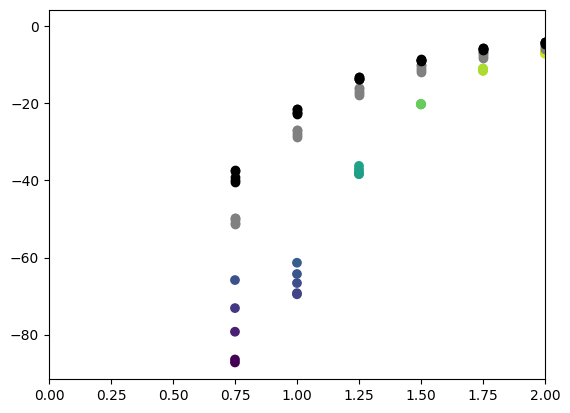

In [234]:
plt.scatter(pc_["RS"], col_pc["ECOL"], c=col_pc["ECOL"])
plt.scatter(pc_["RS"], col_pc["ELEC"], c="gray")
plt.scatter(pc_["RS"], mdcm_pc["ELEC"], c="black")

# plt.ylim(-10, 0)
plt.xlim(0, 2)
# plt.scatter(mdcm_["RS"], mdcm_["rmse"])

(1.75, 3.0)

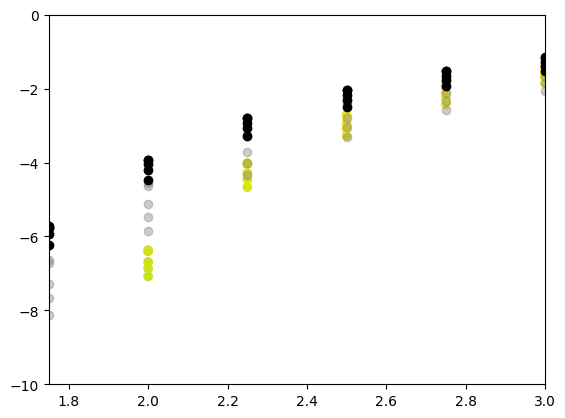

In [236]:
plt.scatter(pc_["RS"], col_pc["ECOL"], c=col_pc["ECOL"])
plt.scatter(pc_["RS"], col_pc["ELEC"], c="gray", alpha=0.4)
plt.scatter(pc_["RS"], mdcm_pc["ELEC"], c="black")

plt.ylim(-10, 0)
plt.xlim(1.75, 3)

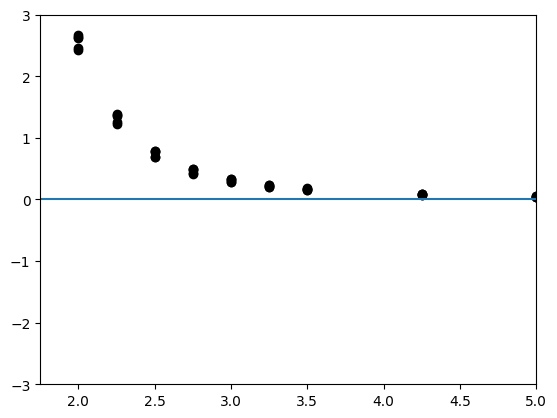

In [249]:
plt.scatter(pc_["RS"], mdcm_pc["ELEC"] - col_pc["ECOL"], c="black")
plt.xlim(1.75, 5)
plt.ylim(-3, 3)
plt.axhline(0)

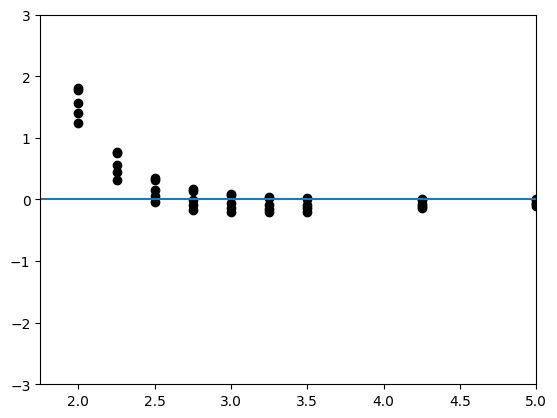

In [250]:
plt.scatter(pc_["RS"], col_pc["ELEC"] - col_pc["ECOL"], c="black")
plt.xlim(1.75, 5)
plt.ylim(-3, 3)
plt.axhline(0)

In [324]:
import seaborn as sns

col_pc["ELEC"]  # -
# col_pc["ECOL"]
mdcm_pc

,ECOL,KEY,TOTAL,ELEC,VDW,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
1-1,-65.850961,1-1,56032.57592,-39.21725,11137.70216,-152.714178,-152.386318,205.733240,11098.48491,11098.48491
1-2,-73.125101,1-2,56862.75752,-37.28936,11435.44122,-152.714169,-152.371993,214.716623,11398.15186,11398.15186
1-3,-79.263613,1-3,56182.45552,-37.51652,11468.04558,-152.714157,NaN,NaN,11430.52906,11430.52906
1-4,-86.461675,1-4,56612.18643,-39.90416,11811.81740,-152.714181,NaN,NaN,11771.91324,11771.91324
1-5,-87.246371,1-5,57121.11424,-40.37117,11946.05148,-152.714180,-152.337984,236.063723,11905.68031,11905.68031
...,...,...,...,...,...,...,...,...,...,...
9-1,-2.417410,9-1,16.05972,-1.92393,-0.16976,-152.714178,-152.718521,-2.725145,-2.09369,-2.09369
9-2,-2.253792,9-2,16.05170,-1.76409,-0.17406,-152.714157,-152.718201,-2.537622,-1.93815,-1.93815
9-3,-2.123595,9-3,15.94861,-1.65216,-0.17710,-152.714183,-152.718003,-2.397030,-1.82926,-1.82926
9-4,-1.953193,9-4,15.95753,-1.52587,-0.17993,-152.714170,-152.717737,-2.238090,-1.70580,-1.70580


In [330]:
pc_.index = pc_["key"]
pc_["error"] = col_pc["ELEC"] - col_pc["ECOL"]
pc_["error2"] = mdcm_pc["ELEC"] - col_pc["ECOL"]
pc_["rmse2"] = [
    list(mdcm_[mdcm_["key"] == k]["rmse"])[0]
    if len(mdcm_[mdcm_["key"] == k]["rmse"]) > 0
    else None
    for k in pc_["key"]
]

pc_

,key,rmse,RS,error,error2,rmse2
key,,,,,,
1-1,1-1,8.762237,0.75,14.462411,26.633711,11.329517
1-2,1-2,8.488964,0.75,22.152381,35.835741,10.783577
1-3,1-3,8.389661,0.75,28.903323,41.747093,10.458187
1-4,1-4,8.608755,0.75,36.732235,46.557515,10.459180
1-5,1-5,8.698054,0.75,37.535061,46.875201,10.538913
...,...,...,...,...,...,...
9-1,9-1,2.928628,2.75,-0.174260,0.493480,1.487427
9-2,9-2,2.819367,2.75,-0.088488,0.489702,1.318907
9-3,9-3,2.849768,2.75,-0.003615,0.471435,1.251514


(1.75, 9.0)

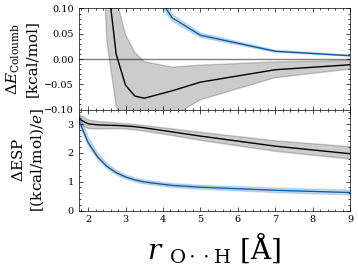

In [364]:
DATA = pc_[pc_["RS"] > 1.6]
FONTSIZE = 11
import matplotlib.pyplot as plt

plt.style.use(["nature", "science", "no-latex"])

fig, ax = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0)

ax[0].set_ylim(-0.1, 0.1)
ax[0].set_xlim(1.75, 9)

ax[0].axhline(0, alpha=0.5, color="k")
sns.lineplot(data=DATA, x="RS", y="error", color="k", ax=ax[0])
sns.lineplot(data=DATA, x="RS", y="error2", ax=ax[0])
# ax[0].grid(axis="y",which="both", alpha=0.5)
# ax[0].grid(axis="x",which="major",alpha=0.5)
ax[0].set_ylabel("$\Delta E_\mathrm{Coloumb}$\n[kcal/mol]", fontsize=FONTSIZE)
ax[1].set_xlabel("$r~_{\mathrm{O}\cdot\cdot\mathrm{H}}$ [$\mathrm{\AA}$]", fontsize=20)

sns.lineplot(data=DATA, x="RS", y="rmse", color="k", ax=ax[1])
sns.lineplot(data=DATA, x="RS", y="rmse2", ax=ax[1])
ax[1].set_ylabel("$\Delta\mathrm{ESP}$\n[(kcal/mol)/$e$]\n", fontsize=FONTSIZE)


ax[1].set_ylim(0, 3.5)
ax[1].set_xlim(1.75, 9)

In [317]:
DATA

,key,rmse,RS,error,error2
key,,,,,
10-1,10-1,2.955400,3.00,-0.211083,0.333787
10-2,10-2,2.804583,3.00,-0.136807,0.328163
10-3,10-3,2.822302,3.00,-0.062712,0.314928
10-4,10-4,2.973924,3.00,0.065426,0.284266
10-5,10-5,3.099075,3.00,0.085664,0.279944
11-1,11-1,2.977154,3.25,-0.210808,0.240172
11-2,11-2,2.781475,3.25,-0.147313,0.233607
11-3,11-3,2.775053,3.25,-0.083059,0.222721
11-4,11-4,2.935704,3.25,0.027705,0.201695
